# Agrupamiento usando DBSCAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

La siguiente función se utiliza para generar aleatoriamente clústeres, según el número de clústeres que se indique, entre otros parámetros.

In [2]:
def generate_clusters(n_clusters, pts_range=(10, 100), kx=(1, 4), ky=(1, 3), 
                      x_offset=(0, 50), y_offset=(0, 50)):
    """
    Generación aleatoria de clusters
        n_clusters - número de clusters a ser generado
        pts_range - rango para el número de puntos por clúster
        kx - rango para el multiplicador que modifica el tamaño del cluster en x
        ky - rango para el multiplicador que modifica el tamaño del cluster en y
        x_offset = rango para la posición del cluster en x
        y_offset = rango para la posición del cluster en y
        
    """
    # Generar valores aleatorios dados los rangos
    n_pts = np.random.randint(pts_range[0], pts_range[1], n_clusters)
    kxs = np.random.randint(kx[0], kx[1], n_clusters)
    kys = np.random.randint(ky[0], ky[1], n_clusters)
    x_offsets = np.random.randint(x_offset[0], x_offset[1], n_clusters)
    y_offsets = np.random.randint(y_offset[0], y_offset[1], n_clusters)
    # Inicializar listas que contendrán los clusters
    clusters_x = []
    clusters_y = []
    # Generar clusteres aleatorios dados los valores de los parámetros
    for idx, npts in enumerate(n_pts):
        xpts = np.random.randn(npts) * kxs[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * kys[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
    # Retornar coordenadas de los clusters
    return clusters_x, clusters_y

A modo de prueba, se genera una cantidad determinada de clústeres (con coordenadas almacenadas en `real_clusters_x` y `real_clusters_y`). Luego se mezclan todos los puntos (de modo que ya no es identificable a qué cluster pertenecían) y se les adapta al formato requerido (npuntos, 2)

In [3]:
# Generar clusters
n_real_clusters = 10
real_clusters_x, real_clusters_y = generate_clusters(n_real_clusters)

# Convertir a arreglo de tamaño (npuntos, 2) 
data = np.float32((np.concatenate(real_clusters_x), np.concatenate(real_clusters_y))).transpose()

Se aplica el algoritmo DBSCAN la función [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Nótese que a esta función ingresan los datos "mezclados"; es decir, datos que no contienen ninguna indicación explícita de a qué cluster pertenecen.

In [4]:
# Definir parámetros de DBSCAN
max_distance = 4
minimum_samples = 10

# Aplicar DBSCAN
db = DBSCAN(eps=max_distance, min_samples=minimum_samples).fit(data)

# Recuperar las etiquetas de cada dato (-1 para outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

Gráfico que muestra los clústeres originales y los clústeres identificados con DBSCAN.

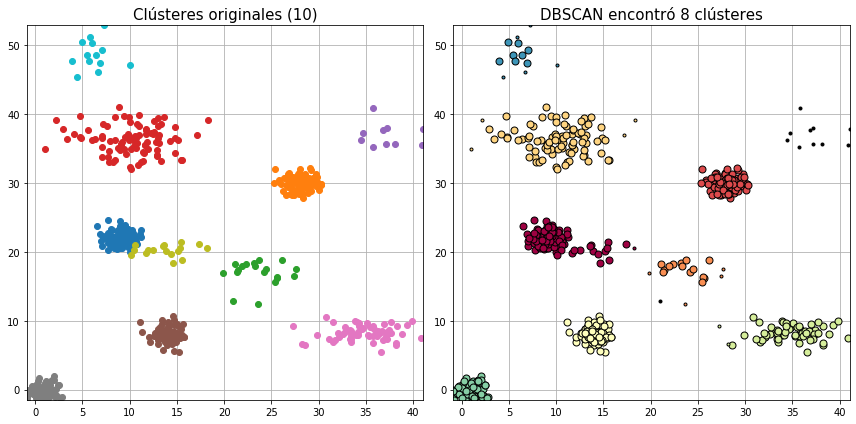

In [5]:
# Rango de los datos
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

# Nueva figura
fig = plt.figure(figsize=(12,6))

# Gráfico de los datos originales (sin agrupamiento)
plt.subplot(121)
for idx, xpts in enumerate(real_clusters_x): 
    plt.plot(xpts, real_clusters_y[idx], 'o')
plt.xlim(min_x, max_x); plt.ylim(min_y, max_y); plt.grid()
plt.title('Clústeres originales ({})'.format(n_real_clusters), fontsize=15)

# Gráfico de los datos agrupados con DBSCAN
plt.subplot(122)
# Extraer una máscara de elementos del cluster
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Colores
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]   # Negro para el ruido
    class_member_mask = (labels == k)
    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=7)
    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x); plt.ylim(min_y, max_y); plt.grid()
plt.title('DBSCAN encontró {} clústeres'.format(n_clusters), fontsize=15)
fig.tight_layout()
plt.show()